<a href="https://colab.research.google.com/github/ilcanez/Data-Anlaysis-UCI-Retail-II-dataset/blob/main/UCI_RETAIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI Retail II dataset/online_retail_II.csv/online_retail_II.csv', delimiter=',')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [96]:
df.shape

(1067371, 8)

In [97]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [98]:
df.describe(include='object')

,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


In [99]:
print(f'duplicated data : {df.duplicated().sum()}')
df.isna().sum()

duplicated data : 34335


,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


data cleaning

In [100]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [101]:
#check how many the duplicated rows
#drop duplicated all the rows
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f'Drop already got dropped :{initial_rows - df.shape[0]}')
print(f'shape after dropping all duplicates : {df.shape}')

Drop already got dropped :34335
shape after dropping all duplicates : (1033036, 8)


In [102]:
# handling missing values on'customer_id' by drop the missing values on the 'description' column
df.dropna(subset=['customer_id'], inplace=True)
print(f'removed column : {initial_rows- df.shape[0]}')
print(f'shape after dropping missing values : {df.shape}')

# handling missing values on'customer_id' by fill the unknown for the missing values
df['customer_id'] = df['customer_id'].fillna('unknown')

removed column : 269486
shape after dropping missing values : (797885, 8)


In [103]:
print(f'data duplicated {df.duplicated().sum()}')

data duplicated 0


In [104]:
df.isna().sum()

,0
invoice,0
stockcode,0
description,0
quantity,0
invoicedate,0
price,0
customer_id,0
country,0


In [105]:
#convert Data Type

df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['customer_id']=df['customer_id'].astype('str')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      797885 non-null  object        
 1   stockcode    797885 non-null  object        
 2   description  797885 non-null  object        
 3   quantity     797885 non-null  int64         
 4   invoicedate  797885 non-null  datetime64[ns]
 5   price        797885 non-null  float64       
 6   customer_id  797885 non-null  object        
 7   country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 54.8+ MB


In [107]:
#Handle DF for Data was Cancelled
df['invoice'] = df['invoice'].astype(str)
cancelled_df = df['invoice'].str.startswith('C')

#separates return or cancelled data
df_returns = df[cancelled_df | (df['quantity']<0) ].copy()

#keep only valid sales on the main df
df = df[~cancelled_df & (df['quantity']>0)].copy()

print(f"\nSeparated {df_returns.shape[0]} return/cancellation entries comprehensively.")
print(f"Shape of main DataFrame (valid sales) after handling cancellations: {df.shape}")
print(f"Shape of returns/cancellations DataFrame: {df_returns.shape}")


Separated 18390 return/cancellation entries comprehensively.
Shape of main DataFrame (valid sales) after handling cancellations: (779495, 8)
Shape of returns/cancellations DataFrame: (18390, 8)


In [108]:
#handle where price <= 0
df = df[df['price']>0].copy()
print(f"Removed {initial_rows - df.shape[0]} rows where 'UnitPrice' was 0.")
print(f"Shape after removing zero UnitPrice: {df.shape}")
df.shape

Removed 287946 rows where 'UnitPrice' was 0.
Shape after removing zero UnitPrice: (779425, 8)


(779425, 8)

In [109]:
df = df[df['description']!='Manual'].copy()

# Feature Engineering

In [110]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [111]:
# Calculate Total Price
df['total_price'] = df['quantity'] * df['price']

#Extract Year, Month
df['year'] = df['invoicedate'].dt.year

df['month'] = df['invoicedate'].dt.month

df['day'] = df['invoicedate'].dt.day_name()

df['hour'] = df['invoicedate'].dt.hour

#add season feature
def get_season(month):
    if (month >= 3) and (month <= 5):
        return 'Spring'
    elif (month >= 6) and (month <= 8):
        return 'Summer'
    elif (month >= 9) and (month <= 11):
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

df.head()


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,year,month,day,hour,season
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,Tuesday,7,Winter
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,Winter
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,Winter
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,Tuesday,7,Winter
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,Tuesday,7,Winter


In [112]:
df.describe()

,quantity,invoicedate,price,total_price,year,month,hour
count,778744.000000,778744,778744.000000,778744.000000,778744.000000,778744.000000,778744.000000
mean,13.489116,2011-01-03 02:40:54.887304960,3.033475,22.116416,2010.432119,7.417520,12.791474
min,1.000000,2009-12-01 07:45:00,0.001000,0.001000,2009.000000,1.000000,6.000000
25%,2.000000,2010-07-02 15:29:00,1.250000,4.950000,2010.000000,5.000000,11.000000
50%,6.000000,2010-12-02 14:40:00,1.950000,12.480000,2010.000000,8.000000,13.000000
75%,12.000000,2011-08-01 14:06:00,3.750000,19.800000,2011.000000,11.000000,14.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,168469.600000,2011.000000,12.000000,20.000000
std,145.894601,NaN,11.279473,225.874101,0.568428,3.422293,2.294308


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778744 entries, 0 to 1067370
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      778744 non-null  object        
 1   stockcode    778744 non-null  object        
 2   description  778744 non-null  object        
 3   quantity     778744 non-null  int64         
 4   invoicedate  778744 non-null  datetime64[ns]
 5   price        778744 non-null  float64       
 6   customer_id  778744 non-null  object        
 7   country      778744 non-null  object        
 8   total_price  778744 non-null  float64       
 9   year         778744 non-null  int32         
 10  month        778744 non-null  int32         
 11  day          778744 non-null  object        
 12  hour         778744 non-null  int32         
 13  season       778744 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(7)
memory usage: 80.2+ MB


In [114]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,total_price,year,month,day,hour,season
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,Tuesday,7,Winter
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,Winter
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,Tuesday,7,Winter
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,Tuesday,7,Winter
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,Tuesday,7,Winter


In [115]:
df.to_csv("final_retail_clean.csv", index=False)


# Analysis Data

Hows the revenue tren month by month?

In [116]:
df['period'] = df['invoicedate'].dt.to_period('M').dt.to_timestamp()

In [117]:
df = df.set_index('invoicedate')

/tmp/ipython-input-1373283848.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Monthly_revenue = df['total_price'].resample('M').sum()


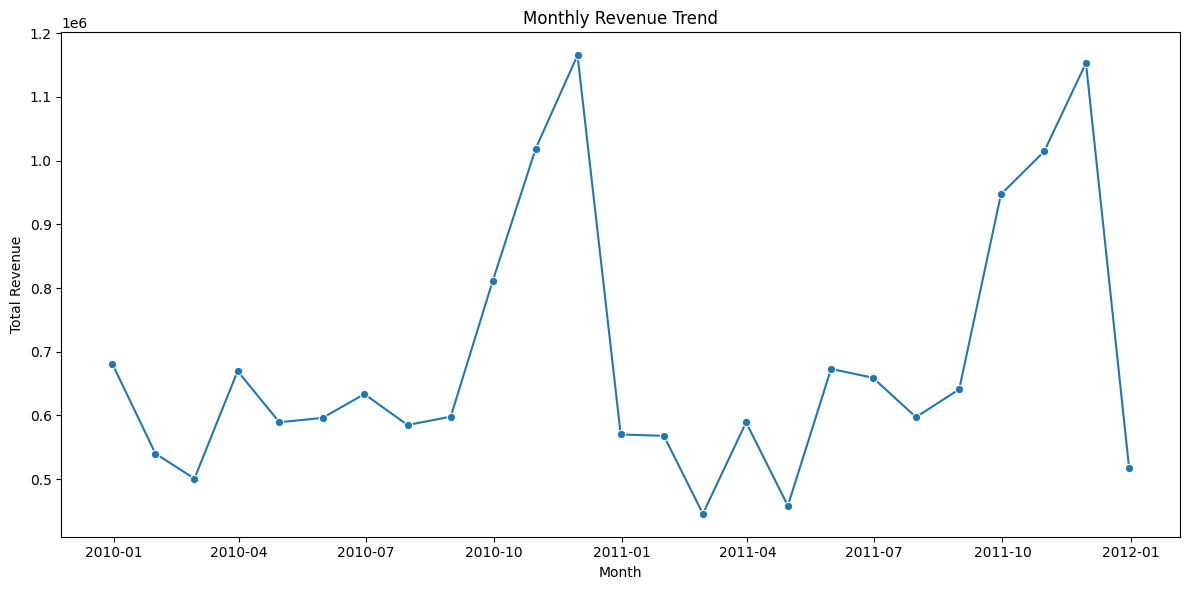

In [118]:
from matplotlib import markers
Monthly_revenue = df['total_price'].resample('M').sum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=Monthly_revenue,marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

The revenue data ranges from 2010 to early 2012. October to Desember 2010 recorded the highest revenue, increasing by approximately 82% compared to the previous month (September 2010). The next highest peaks occurred in October and November 2011, where revenue rose by around 80% from the preceding months, showing a recurring seasonal spike.

Across all years, the revenue pattern is consistent: after the strong performance in October–November, revenue drops sharply at the beginning of the following year. This indicates a clear seasonal cycle, likely driven by year-end or holiday-related demand, followed by a slowdown in early-year purchasing activity.

---


Analysis High Revenue by product

In [119]:
revenue_product = df.groupby('description').agg(
        revenue = ('total_price', 'sum'),
        transactions = ('invoice', 'nunique'),  # jumlah transaksi
        frequency = ('invoice', 'count')        # jumlah baris data
    ).sort_values(by='revenue', ascending=False).head(10).reset_index()

revenue_product['aov'] = revenue_product['revenue'] / revenue_product['transactions']
revenue_product

,description,revenue,transactions,frequency,aov
0,REGENCY CAKESTAND 3 TIER,277656.25,3317,3335,83.707039
1,WHITE HANGING HEART T-LIGHT HOLDER,247048.01,4888,5016,50.541737
2,"PAPER CRAFT , LITTLE BIRDIE",168469.60,1,1,168469.600000
3,JUMBO BAG RED RETROSPOT,134307.44,2612,2641,51.419387
4,POSTAGE,124648.04,1803,1803,69.133688
5,ASSORTED COLOUR BIRD ORNAMENT,124351.86,2652,2692,46.889842
6,PARTY BUNTING,103283.38,2077,2098,49.727193
7,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,195,198,417.521692
8,PAPER CHAIN KIT 50'S CHRISTMAS,76598.18,1691,1737,45.297564
9,CHILLI LIGHTS,69084.30,922,924,74.928742


/tmp/ipython-input-4131700821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='description', data=revenue_product, palette='viridis')


Text(0, 0.5, 'Total Revenue')

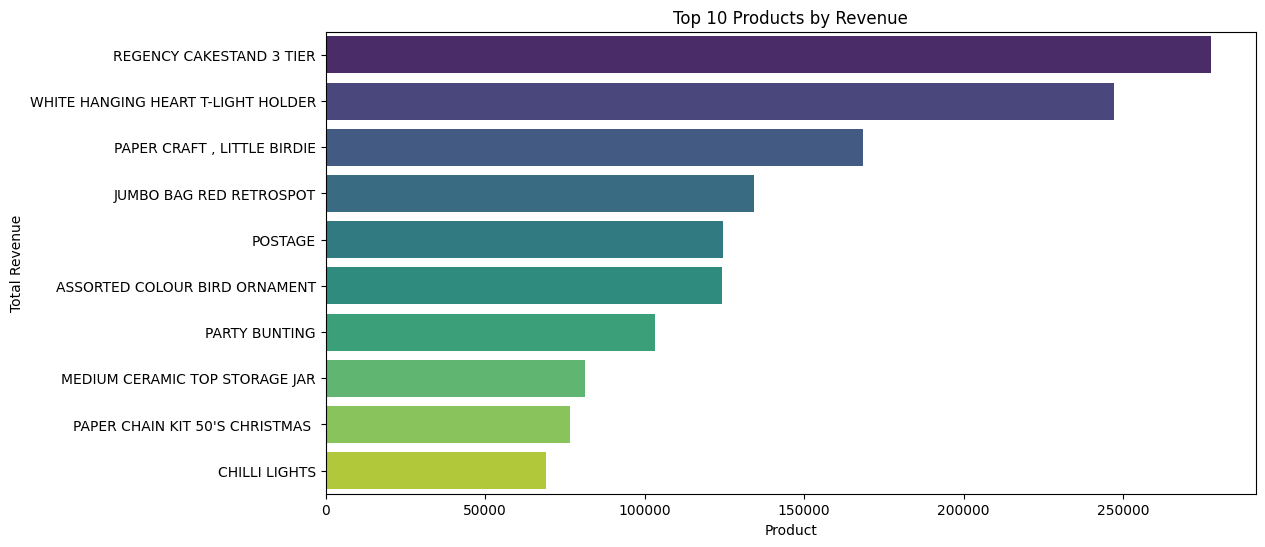

In [120]:
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='description', data=revenue_product, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')


The analysis shows that the highest revenue comes from products with consistently high purchase frequency, such as REGENCY CAKESTAND 3 TIER and WHITE HANGING HEART T-LIGHT HOLDER, indicating strong and stable demand. Some items, like PAPER CRAFT, LITTLE BIRDIE, appear as anomalies due to extremely high revenue from a single transaction and should be verified. Several products, such as JUMBO BAG RED RETROSPOT and ASSORTED COLOUR BIRD ORNAMENT, generate revenue through frequent low-value purchases, making them reliable volume drivers suitable for bundling and cross-selling. Premium items like MEDIUM CERAMIC TOP STORAGE JAR contribute less volume but offer high margins. Seasonal products, such as PAPER CHAIN KIT 50'S CHRISTMAS, also add meaningful revenue, highlighting the importance of seasonal inventory planning. Overall, revenue sustainability depends on high-frequency items, while premium products help strengthen overall profitability.


In [121]:
df['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [122]:

df_non_uk = df_non_uk['season'] = df['month'].apply(get_season)
season_revenue = df.groupby('season')['total_price'].sum().sort_values(ascending=False).reset_index()
season_revenue.head()

,season,total_price
0,Autumn,6109788.945
1,Winter,3822983.048
2,Summer,3714482.731
3,Spring,3575771.874


Generated Seasonal Revenue using bar chart


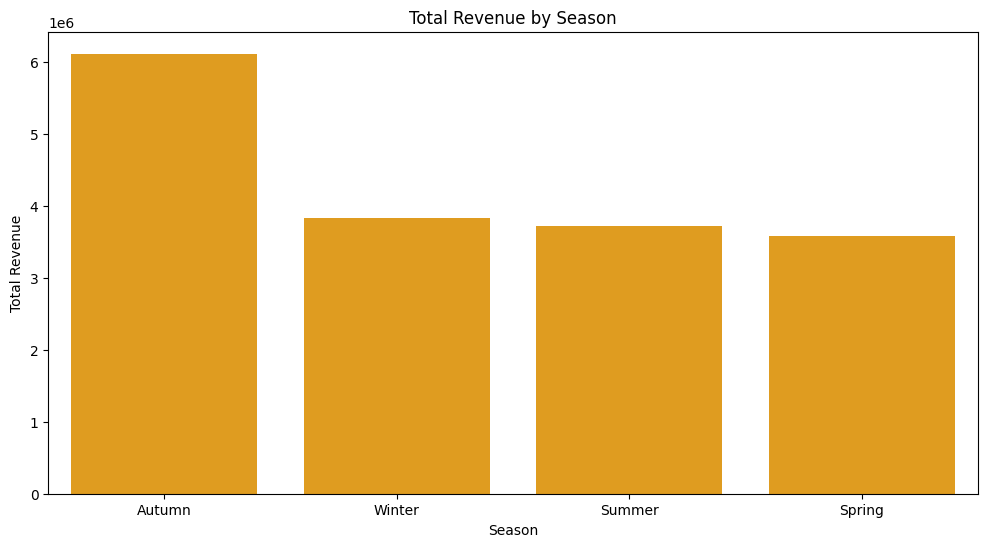

In [123]:


plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='total_price', data=season_revenue, color='orange',)
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
print('Generated Seasonal Revenue using bar chart')


Text(0, 0.5, 'Total Revenue')

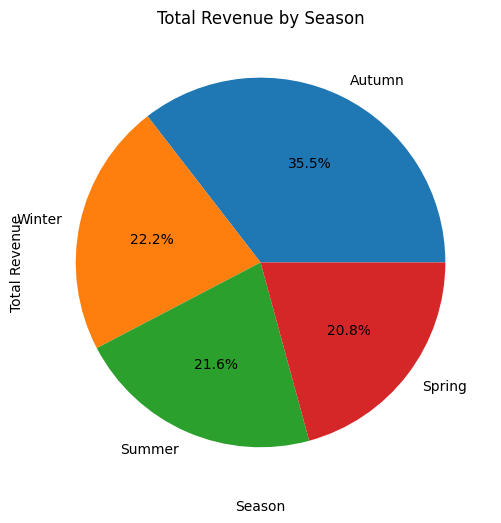

In [124]:

plt.figure(figsize=(12, 6))
plt.pie(season_revenue['total_price'], labels=season_revenue['season'], autopct='%1.1f%%')
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')

In [125]:
autumn = df[df['season'] == 'Autumn']

autumn_top_products = (
    autumn.groupby('description')
    .agg(
        revenue = ('total_price', 'sum'),
        transactions = ('invoice', 'nunique'),  # jumlah transaksi
        frequency = ('invoice', 'count')        # jumlah baris data
    )
)

# Hitung AOV dengan rumus yang benar
autumn_top_products['aov'] = autumn_top_products['revenue'] / autumn_top_products['transactions']

# top 10 produk berdasarkan revenue
autumn_top_products = autumn_top_products.sort_values(by='revenue', ascending=False).head(10)
autumn_top_products.reset_index(inplace=True)
autumn_top_products


,description,revenue,transactions,frequency,aov
0,REGENCY CAKESTAND 3 TIER,97567.02,1134,1144,86.037937
1,WHITE HANGING HEART T-LIGHT HOLDER,65686.95,1386,1429,47.393182
2,JUMBO BAG RED RETROSPOT,58664.87,1135,1152,51.687110
3,PAPER CHAIN KIT 50'S CHRISTMAS,54681.81,1214,1247,45.042677
4,ASSORTED COLOUR BIRD ORNAMENT,47584.76,960,978,49.567458
5,ROTATING SILVER ANGELS T-LIGHT HLDR,45054.74,386,409,116.722124
6,POSTAGE,43338.85,665,665,65.171203
7,PAPER CHAIN KIT VINTAGE CHRISTMAS,37017.95,1017,1025,36.399164
8,RABBIT NIGHT LIGHT,35380.90,501,517,70.620559
9,CHILLI LIGHTS,29798.67,381,381,78.211732


/tmp/ipython-input-2685170756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='description', data=autumn_top_products, palette='viridis')


Text(0, 0.5, 'Total Revenue')

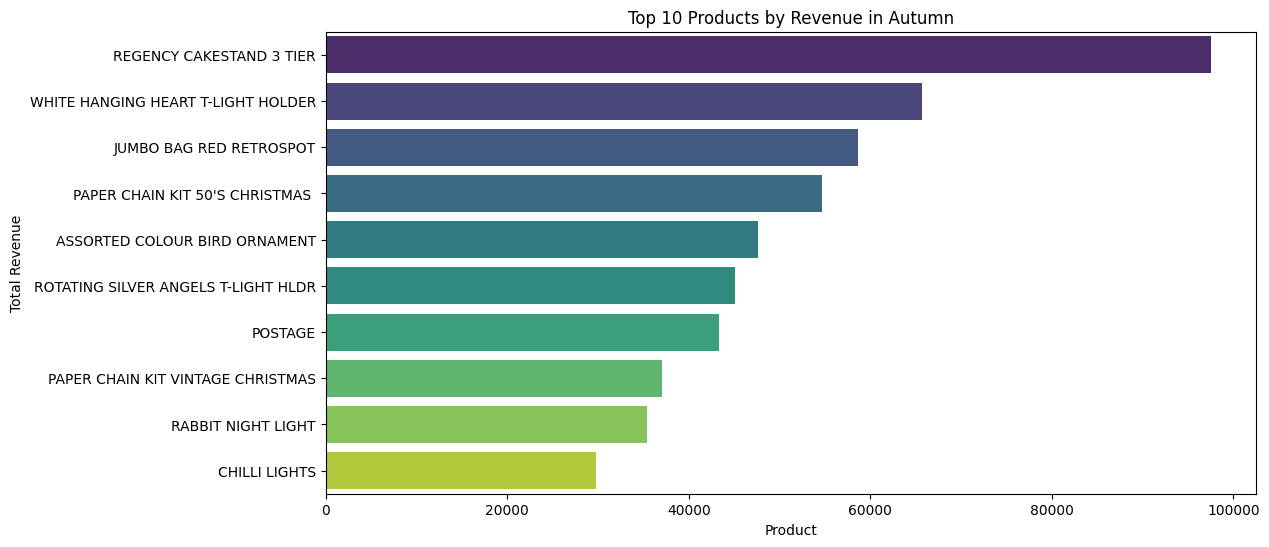

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='description', data=autumn_top_products, palette='viridis')
plt.title('Top 10 Products by Revenue in Autumn')
plt.xlabel('Product')
plt.ylabel('Total Revenue')

The seasonal revenue analysis shows that Autumn contributes the highest share of total revenue at 35.5 percent, indicating stronger purchasing activity during this period. The top products in Autumn are dominated by stable high performers such as REGENCY CAKESTAND 3 TIER, WHITE HANGING HEART T-LIGHT HOLDER, and JUMBO BAG RED RETROSPOT, all of which maintain strong demand with high transaction counts. Several Christmas-themed items, including PAPER CHAIN KIT 50'S CHRISTMAS and PAPER CHAIN KIT VINTAGE CHRISTMAS, also appear prominently, suggesting an early increase in seasonal shopping during Autumn. Items like ROTATING SILVER ANGELS T-LIGHT HLDR stand out with a notably high average order value, reflecting strong interest in premium or decorative goods. Overall, Autumn shows a combination of consistent best-sellers and seasonal spikes, making it a critical period for maximizing both volume and margin.

# Recognize Most highest revenue by the country except UK

In [130]:
df_non_uk = df[df['country'] != 'United Kingdom'].reset_index(drop=True)
revenue_country = (
    df_non_uk
      .groupby('country')
      .agg(
          revenue=('total_price','sum'),
          transactions=('invoice','nunique'),
          frequency=('invoice','count')
      ).sort_values('revenue', ascending=False).head(10).reset_index()
)
revenue_country['aov'] = revenue_country['revenue'] / revenue_country['transactions']
revenue_country



,country,revenue,transactions,frequency,aov
0,EIRE,597012.430,543,15541,1099.470405
1,Netherlands,553841.410,223,5080,2483.593767
2,Germany,421948.441,780,16421,540.959540
3,France,334255.890,607,13503,550.668682
4,Australia,168150.010,90,1784,1868.333444
5,Spain,106921.500,152,3660,703.430921
6,Switzerland,100061.940,90,3005,1111.799333
7,Sweden,89736.140,102,1314,879.766078
8,Denmark,68580.690,43,778,1594.899767
9,Belgium,63879.170,148,3054,431.616014


#Finding The highest Revenue by the country except UK, because the data heavy UK bias

Text(0, 0.5, 'Total Revenue')

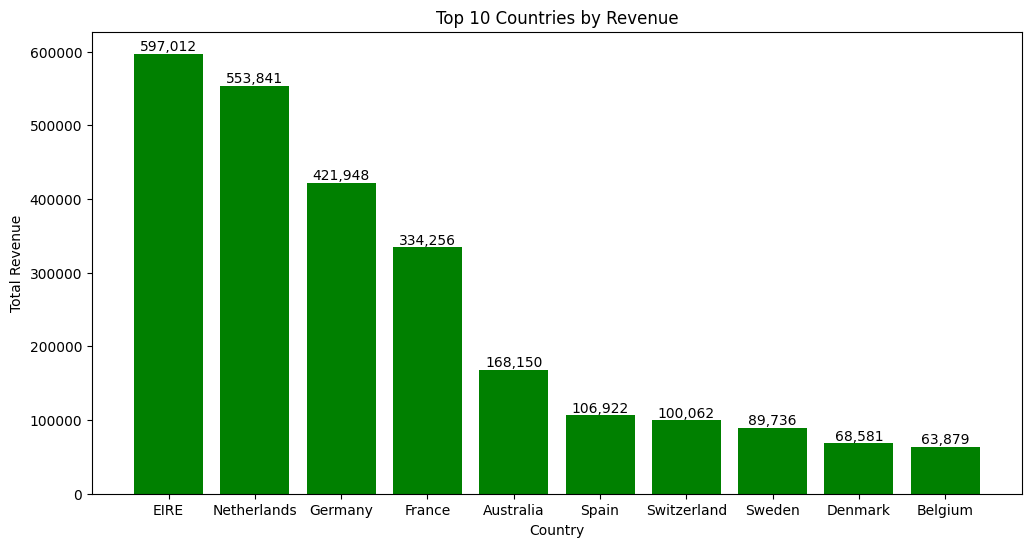

In [131]:
#Finding The highest Revenue by the country except UK, because the data heavy UK bias


revenue_country

plt.figure(figsize=(12, 6))
bars =plt.bar(revenue_country['country'], revenue_country['revenue'], color='green')
for bar in bars:
    yval = bar.get_height()
    plt.text( bar.get_x() + bar.get_width()/2,
              yval,
              f"{yval:,.0f}",   # format dengan koma 1,000,000
              ha='center',
              va='bottom',
              fontsize=10)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')





/tmp/ipython-input-2364863427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


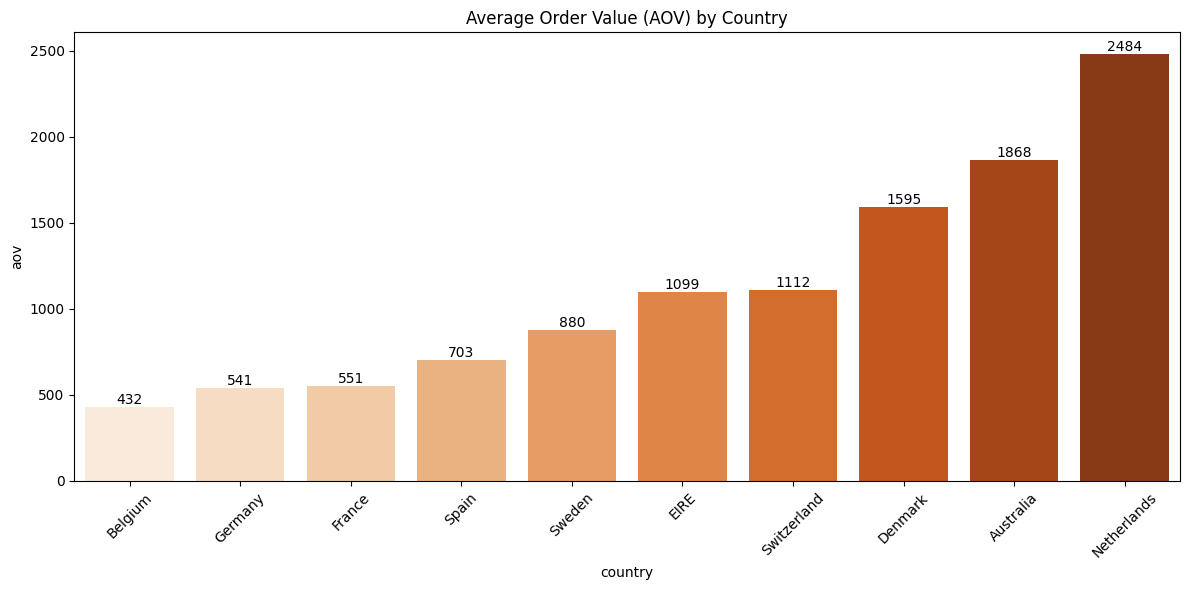

In [132]:
revenue_country_sorted = revenue_country.sort_values('aov', ascending=True)

plt.figure(figsize=(12,6))
palette = sns.color_palette("Oranges", n_colors=len(revenue_country_sorted))

ax = sns.barplot(
    data=revenue_country_sorted,
    x='country',
    y='aov',
    palette=palette
)

# label angka
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height(),
        f"{p.get_height():.0f}",
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45)
plt.title("Average Order Value (AOV) by Country")
plt.tight_layout()
plt.show()


Based on the analysis of countries excluding the UK, EIRE generates the highest revenue, driven primarily by its very large transaction frequency despite having a relatively low AOV. In contrast, countries such as the Netherlands and Australia show significantly higher AOV around 109 and 95 respectively indicating that customers in these markets tend to place higher-value orders even though their total number of transactions is much lower compared to EIRE or Germany. Meanwhile, countries like Belgium and Germany exhibit lower AOV, meaning their revenue contribution relies more on transaction volume than order value. Overall, these findings highlight that revenue performance across countries is shaped by a combination of transaction intensity (frequency) and average order value (AOV), offering valuable direction for tailoring country-specific marketing and sales strategies.

In [150]:
eire_df = df_non_uk[df_non_uk['country'] == 'EIRE']
eire_top_products = eire_df.groupby('description').agg(
        revenue = ('total_price', 'sum'),
        transactions = ('invoice', 'nunique'),  # jumlah transaksi
        frequency = ('invoice', 'count')        # jumlah baris data
    ).sort_values(by='revenue',ascending=False).head(10).reset_index()
eire_top_products['aov'] = eire_top_products['revenue'] / eire_top_products['transactions']

eire_top_products

,description,revenue,transactions,frequency,aov
0,REGENCY CAKESTAND 3 TIER,14636.85,127,128,115.250787
1,CARRIAGE,8975.00,180,180,49.861111
2,SET/5 RED SPOTTY LID GLASS BOWLS,5652.60,29,29,194.917241
3,COOK WITH WINE METAL SIGN,5495.84,45,45,122.129778
4,WHITE HANGING HEART T-LIGHT HOLDER,4728.90,73,73,64.779452
5,PLEASE ONE PERSON METAL SIGN,4359.60,32,32,136.237500
6,3 TIER CAKE TIN RED AND CREAM,4265.55,10,10,426.555000
7,YOU'RE CONFUSING ME METAL SIGN,4140.96,23,23,180.041739
8,RED RETROSPOT CAKE STAND,3657.30,30,30,121.910000
9,CHOCOLATE THIS WAY METAL SIGN,3575.40,20,20,178.770000


/tmp/ipython-input-1894487888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='description', data=eire_top_products, palette='viridis')


Text(0, 0.5, 'Total Revenue')

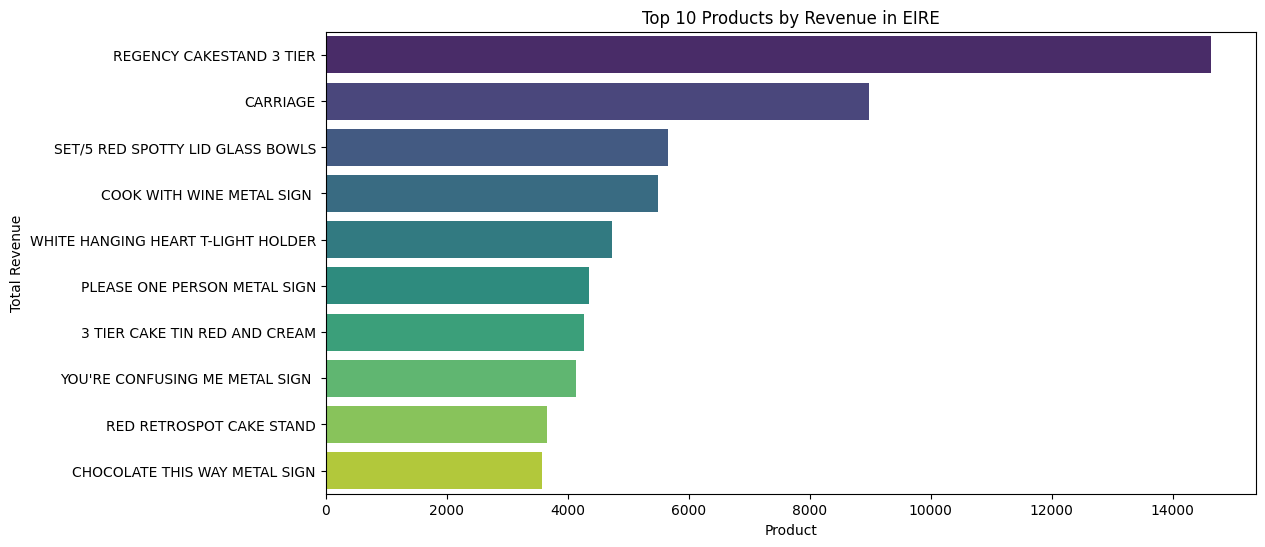

In [151]:

plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='description', data=eire_top_products, palette='viridis')
plt.title('Top 10 Products by Revenue in EIRE')
plt.xlabel('Product')
plt.ylabel('Total Revenue')

/tmp/ipython-input-3125978471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='description', data=eire_top_products,palette='viridis')


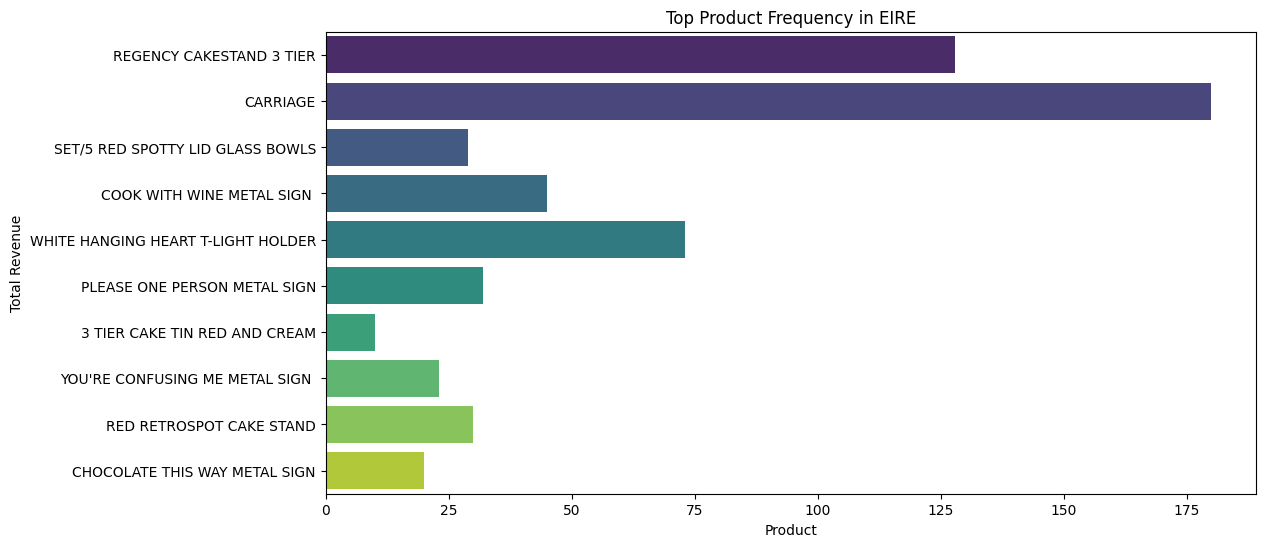

In [152]:

plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='description', data=eire_top_products,palette='viridis')
plt.title('Top Product Frequency in EIRE')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

The Regency Cakestand 3 Tier stands out as the product with the highest revenue, generating approximately 15,000. Although most transactions consist of only one unit per purchase as indicated by its AOV matching the item price the product still demonstrates strong demand with 128 transactions. Another top performer is the Carriage, which has generated around 8,975 in revenue. Unlike the cakestand, this product shows a higher average quantity purchased per transaction, reflected in an AOV higher than its unit price. The Carriage also has the highest demand, supported by its 180 purchase frequencies. Both products exhibit strong market performance in terms of demand and revenue. Therefore, sales strategies can be focused on these two items. Consider implementing targeted promotions aimed at increasing the number of units purchased per transaction, which may further boost total revenue.

In [145]:
eire_season = eire_df.groupby('season')['total_price'].sum().sort_values(ascending=False).reset_index()
eire_season

,season,total_price
0,Autumn,194600.48
1,Summer,155403.77
2,Winter,144624.41
3,Spring,102383.77


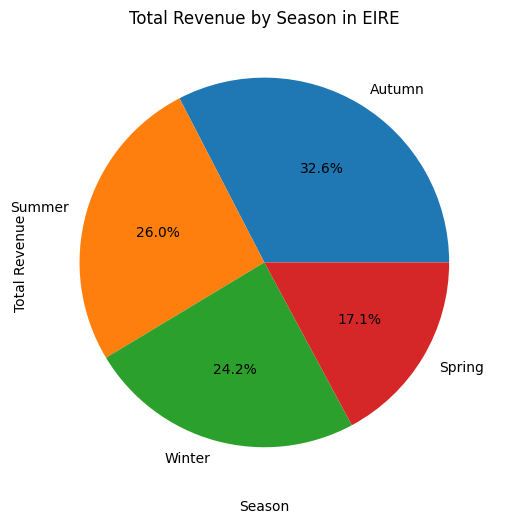

In [146]:
plt.figure(figsize=(12, 6))
plt.pie(eire_season['total_price'], labels=eire_season['season'], autopct='%1.1f%%')
plt.title('Total Revenue by Season in EIRE')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-1952256218.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='description', data=eire_product_autumn, palette='viridis')


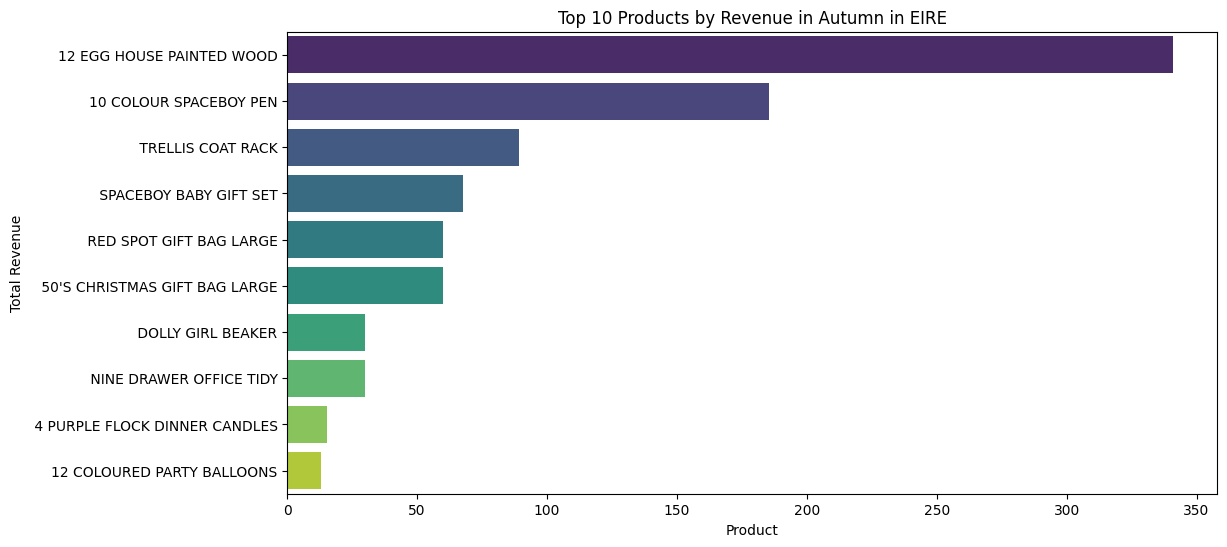

In [149]:
eire_season_autumn = eire_df[eire_df['season'] == 'Autumn']
eire_product_autumn = eire_season_autumn.groupby('description').agg(
        revenue = ('total_price', 'sum'),
        transactions = ('invoice', 'nunique'),  # jumlah transaksi
        frequency = ('invoice', 'count')        # jumlah baris data
    ).head(10).sort_values(by='revenue', ascending=False).reset_index()

eire_product_autumn['aov'] = eire_product_autumn['revenue'] / eire_product_autumn['transactions']

plt.figure(figsize=(12, 6))
sns.barplot(x='revenue', y='description', data=eire_product_autumn, palette='viridis')
plt.title('Top 10 Products by Revenue in Autumn in EIRE')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.show()

The season that generated the highest revenue is Autumn, contributing an increase of 32.6% compared to other seasons. The top-performing product during this period is “12 Egg House Painted Wood”, which recorded approximately 350 in revenue (38%). The product also shows a relatively high Average Order Value (AOV) of 56, indicating that customers tend to buy more than one unit per transaction. Across the Autumn season, this product was purchased in 6 transactions, showing consistent demand despite the limited number of orders.

Recommendations


*   Stock Optimization: Considering that buyers tend to purchase this product in multiple quantities, ensure adequate stock availability—especially entering the Autumn season—to maximize revenue potential.
*   Bundle Strategy: Offer bundle packages (e.g., “Autumn Decorative Set”) combining this product with other wooden craft items to increase average basket size.
*   Seasonal Promotion: Since Autumn shows the strongest performance, launch targeted seasonal promotions or themed campaigns to further boost visibility and drive more sales.
*   Product Highlighting: Because this product performs well despite low transaction count, highlight it in catalog banners or “Recommended for Autumn” sections to increase conversion.











